<a href="https://colab.research.google.com/github/komal2093/Week1/blob/main/PlantDiseaseDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.70G/2.70G [00:23<00:00, 122MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import glob as gb
import cv2

In [ ]:
train = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [ ]:
size = 224
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255,
    preprocessing_function=None,
    validation_split=0.1
).flow_from_directory(
    train,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='training',
    shuffle=True
)

Found 63282 images belonging to 38 classes.


In [ ]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

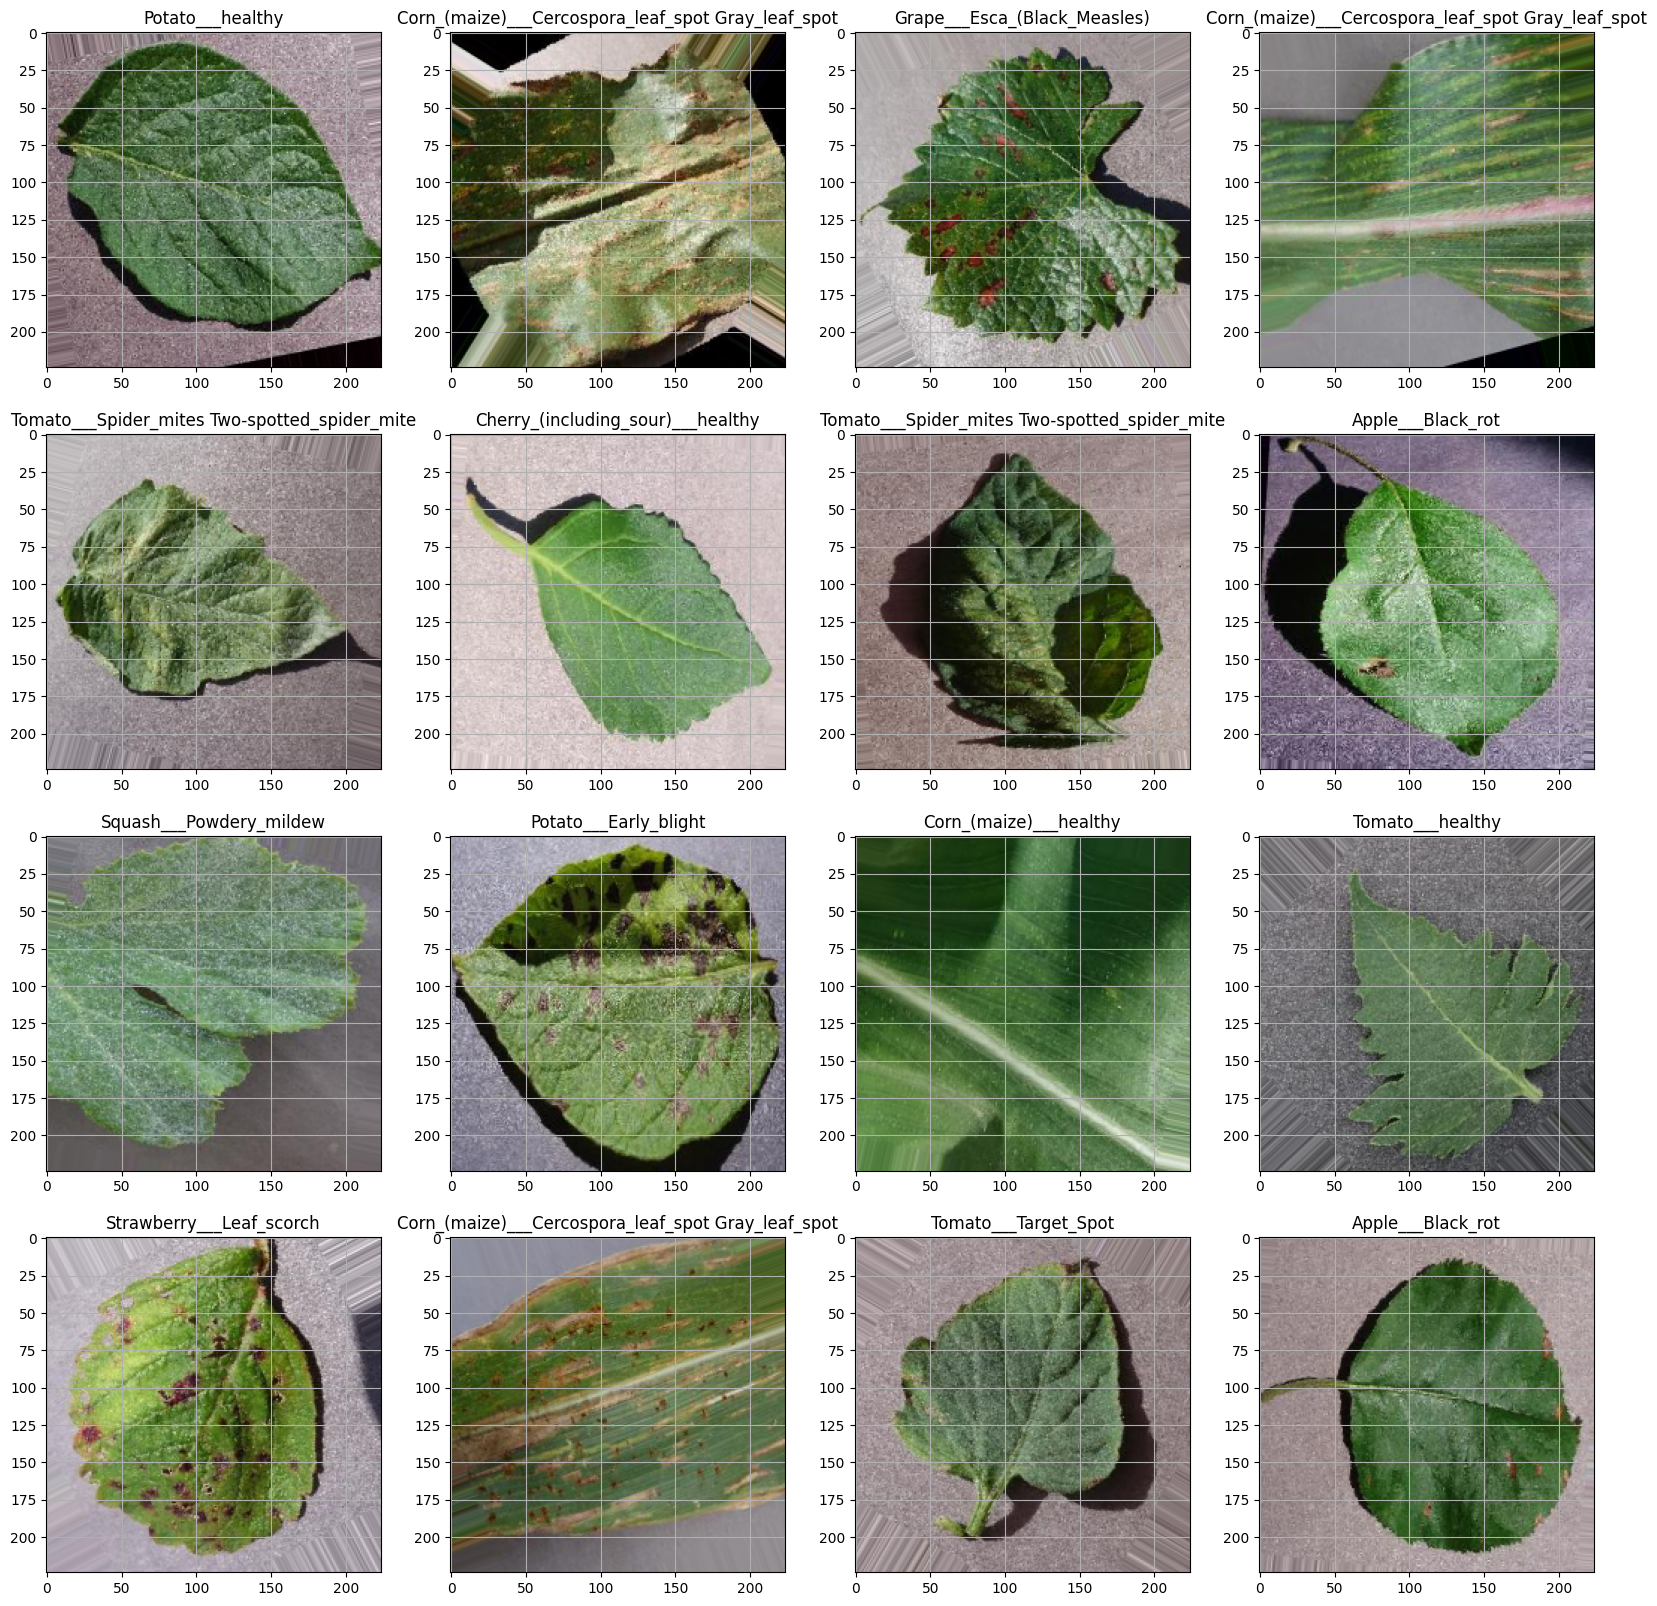

In [ ]:
# Display some images
classes = list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for x_batch, y_batch in train_generator:
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(x_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
        plt.grid(None)
    plt.show()
    break

In [ ]:
valid = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
valid_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function = None,
    validation_split=0.1
).flow_from_directory(
    valid,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation',
    shuffle=False
)

Found 1742 images belonging to 38 classes.


In [ ]:
test = '/root/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    preprocessing_function = None,
).flow_from_directory(
    test,
    target_size=(size, size),
    batch_size=164,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)


Found 17572 images belonging to 38 classes.


In [ ]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
from tensorflow import keras
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, padding='same', activation='relu', name="Conv1", input_shape=[224, 224, 3]))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu', name="Conv3"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu', name="Conv4"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool4"))

model.add(keras.layers.Flatten(name='Flatten1'))

model.add(keras.layers.Dense(units=128, activation='relu', name="Dense1"))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(units=64, activation='relu', name="Dense2"))
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(units=38, activation='softmax', name="Output"))

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 112, 112, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv4 (Conv2D)                       │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool4 (MaxPooling2D)                 │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten1 (Flatten)                   │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense2 (Dense)                       │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 38)                  │           2,470 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,858,406 (26.16 MB)

 Trainable params: 6,858,406 (26.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)
model_checkpoint = ModelCheckpoint(
    'bestmodel.keras',
    monitor='val_loss',
    save_best_only=True
)
model_ReduceLRonPlateau = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=15,
    min_lr=0.000001
)
callbacks = [early_stopping, model_checkpoint, model_ReduceLRonPlateau]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision', 'recall'])

In [ ]:
history = model.fit(train_generator, epochs=5, validation_data=valid_generator, callbacks=callbacks)

Epoch 1/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 778s 2s/step - accuracy: 0.7637 - loss: 0.7444 - precision: 0.8476 - recall: 0.6911 - val_accuracy: 0.7882 - val_loss: 0.6698 - val_precision: 0.8511 - val_recall: 0.7348 - learning_rate: 0.0010
Epoch 2/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 791s 2s/step - accuracy: 0.8429 - loss: 0.4829 - precision: 0.8871 - recall: 0.8046 - val_accuracy: 0.8330 - val_loss: 0.5343 - val_precision: 0.8726 - val_recall: 0.8020 - learning_rate: 0.0010
Epoch 3/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 765s 2s/step - accuracy: 0.8829 - loss: 0.3574 - precision: 0.9110 - recall: 0.8600 - val_accuracy: 0.8611 - val_loss: 0.4109 - val_precision: 0.8896 - val_recall: 0.8375 - learning_rate: 0.0010
Epoch 4/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 771s 2s/step - accuracy: 0.9028 - loss: 0.2901 - precision: 0.9229 - recall: 0.8869 - val_accuracy: 0.9041 - val_loss: 0.3047 - val_precision: 0.9218 - val_recall: 0.8869 - learning_rate: 0.0010
Epoch 5/5
386/386 ━━━━━━━━━━━━━━━━━━━━ 806s 2s/step - accuracy: 

In [ ]:
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
pre = history.history['precision']
val_pre = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']

epochs = range(1, len(loss) + 1)


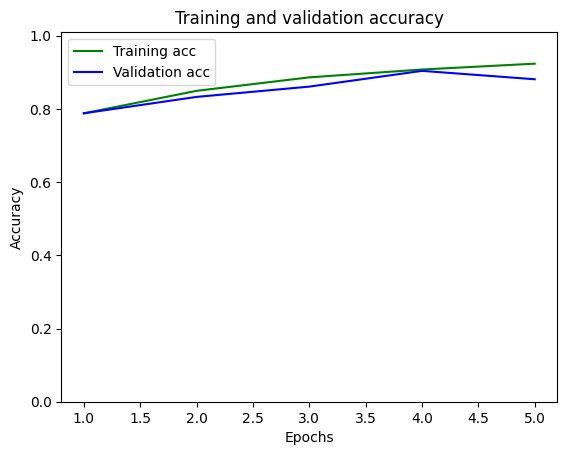

In [ ]:
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1.01)
plt.show()

In [ ]:
model.evaluate(test_generator)
print("loss:", model.evaluate(test_generator)[0])
print("accuracy:", model.evaluate(test_generator)[1])
print("precision:", model.evaluate(test_generator)[2])
print("recall:", model.evaluate(test_generator)[3])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 376ms/step - accuracy: 0.9073 - loss: 0.2757 - precision: 0.9232 - recall: 0.8961
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 326ms/step - accuracy: 0.9073 - loss: 0.2757 - precision: 0.9232 - recall: 0.8961
loss: 0.256865918636322
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 328ms/step - accuracy: 0.9073 - loss: 0.2757 - precision: 0.9232 - recall: 0.8961
accuracy: 0.9142385721206665
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 335ms/step - accuracy: 0.9073 - loss: 0.2757 - precision: 0.9232 - recall: 0.8961
precision: 0.9308988451957703
108/108 ━━━━━━━━━━━━━━━━━━━━ 36s 329ms/step - accuracy: 0.9073 - loss: 0.2757 - precision: 0.9232 - recall: 0.8961
recall: 0.9023446440696716


In [ ]:
#save the model
model.save('cnn_model.keras')